In [18]:
#IMPORTAR PACKAGES y LIBRARYS

#Librerías útiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import strptime
from scipy.signal import periodogram
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import combinations
from tqdm.notebook import tqdm
from dateutil.relativedelta import relativedelta

#Modelos de Pruebas Estadísticas
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import mse,rmse,rmspe,bias,meanabs

#Modelos predictivos estadísticos
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

#Configuraciones
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
#DICCIONARIOS, OBJETOS
dic_mes = {
        'Enero': 1,
        'Febrero': 2,
        'Marzo': 3,
        'Abril':4,
         'Mayo':5,
         'Junio':6,
         'Julio':7,   
         'Agosto':8,
         'Setiembre':9,
         'Octubre':10,
         'Noviembre':11,
         'Diciembre':12
        }



In [20]:
#PREPARACIÓN_DATA

df= pd.read_excel("C:/Users/Usuario/OneDrive - prediqtdata.com/Desktop/Renato/Python/script atenea/consolidado_moderno.xlsx"
,sheet_name="Salsas")
df.replace(dic_mes, inplace=True)
df['Quarter'] = df['MES'].apply(lambda x: 'Quarter1' if x in [1, 2, 3] else 'Quarter2' if x in [4, 5, 6] else 'Quarter3' if x in [7, 8, 9] else 'Quarter4')
df['Month_in_Quarter'] = df['MES'].apply(lambda x: 1 if x % 3 == 1 else 2 if x % 3 == 2 else 3)
df["PERIODO"]= df["AÑO"].astype(str)+"-"+df["MES"].astype(str)

df['PERIODO'] = pd.to_datetime(df['PERIODO'])    
#df['PERIODO'] = df['PERIODO'].dt.to_period('M')
df = df.set_index('PERIODO')

cols=['PERIODO','AÑO','MES','Quarter','Month_in_Quarter','OFICINA DE VENTAS'
      ,'VENTA SELL IN', 'VENTA SELL OUT TOTAL'
      , 'SHARE VOLUMEN ALICORP', 'SHARE VOLUMEN MERCADO'
      ,'SHARE % ALICORP','SHARE % MERCADO']

cols_data =['VENTA SELL IN'
      #, 'VENTA SELL OUT TOTAL'
      #, 'SHARE VOLUMEN ALICORP'
      #,'SHARE VOLUMEN MERCADO'
      #,'SHARE % ALICORP'
      #,'SHARE % MERCADO'
      ]


df_ini=df[cols_data]
df_ini


#df_train, df_test= np.split(df, [int(0.85 *len(df))])
#df_train, df_val,df_test= np.split(df, [int(0.85 *len(df)),int(0.95 *len(df))])


#df_train= df_train[cols_data]
#avgs_train= df_train.mean()
#std_train= df_train.std()

#for col in df_train.columns:
#    df_train[col] = (df_train[col] - avgs_train.loc[col]) / std_train.loc[col]

#df_train = df_train.diff().dropna()
#df_train.shape
#print(df_train)


,VENTA SELL IN
PERIODO,
2019-01-01,680.000000
2019-02-01,434.000000
2019-03-01,640.000000
2019-04-01,562.000000
2019-05-01,651.000000
2019-06-01,603.000000
2019-07-01,577.000000
2019-08-01,467.000000
2019-09-01,616.000000


  0%|          | 0/18 [00:00<?, ?it/s]

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=510.607, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=505.908, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=508.613, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[6] intercept   : AIC=504.888, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[6] intercept   : AIC=505.994, Time=0.08 sec
 ARIMA(1,1,0)(1,0,1)[6] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[6] intercept   : AIC=500.170, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[6] intercept   : AIC=501.065, Time=0.10 sec
 ARIMA(2,1,0)(0,0,1)[6] intercept   : AIC=501.085, Time=0.10 sec
 ARIMA(2,1,0)(1,0,1)[6] intercept   : AIC=503.060, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[6] intercept   : AIC=496.879, Time=0.07 sec
 ARIMA(3,1,0)(1,0,0)[6] intercept   : AIC=498.151, Time=0.12 sec
 ARIMA(3,1,0)(0,0,1)[6] intercept   : AIC=498.252, Time=0.11 sec
 ARIMA(3,1,0)(1,0,1)[6] intercept   : AIC=inf, Time=0.2

Text(0.5, 1.0, 'Auto SARIMA, MSE: 23,018.39')

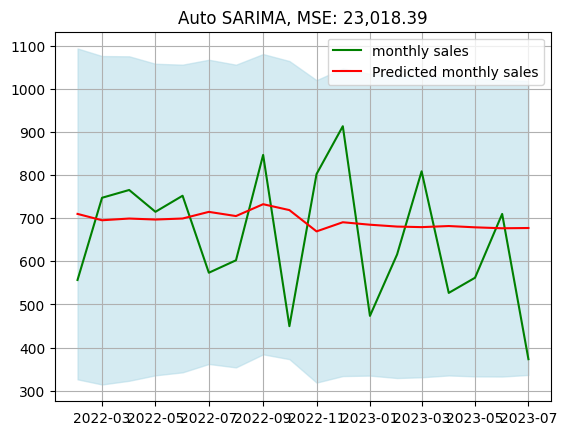

MAPE: 0.231


In [21]:
#MODELO SARIMA
nobs=18

pred_dict = {'date':[], 'pred_VENTA SELL IN':[], 'ci_lower':[],'ci_upper':[] }

for i in tqdm(range(nobs)):
    
    # we will use directly monthly sales without transforming
    training_data = df_ini['VENTA SELL IN'][:(-nobs+i)]
    
    model = auto_arima(training_data, start_p=0, start_q=0,
                       max_p=3, max_q=3, max_d = 2,
                       seasonal=True,m=6,
                       start_P=0, start_Q = 0, max_P = 3, max_Q = 3,
                       max_D = 2,information_criterion='aic',test='adf',
                       trace=True)
    print('best model {}'.format(model.get_params()['order']), end = ' ')
    pred, confint = model.predict(n_periods=1, return_conf_int=True)
    pred_date = training_data.index[-1] + relativedelta(months = 1)
    
    pred_dict['date'].append(pred_date)
    pred_dict['pred_VENTA SELL IN'].append(pred[0])
    pred_dict['ci_lower'].append(confint[0][0])
    pred_dict['ci_upper'].append(confint[0][1])
    

df_pred = pd.DataFrame(pred_dict)
df_pred = df_pred.set_index('date')
df_pred['VENTA SELL IN'] = df_ini['VENTA SELL IN'][-nobs:]

plt.plot(df_pred['VENTA SELL IN'], color = 'green')
plt.plot(df_pred['pred_VENTA SELL IN'], color = 'red')
plt.legend(['monthly sales', 'Predicted monthly sales'])
plt.fill_between(df_pred.index,
                 df_pred['ci_lower'],
                 df_pred['ci_upper'], color='lightblue', alpha=0.5)
plt.title('Auto SARIMA, MSE: {:,}'.format(round(mean_squared_error(
    df_pred['VENTA SELL IN'], df_pred['pred_VENTA SELL IN']),2)))
plt.grid()
plt.show()

MAPE= mean_absolute_percentage_error(df_pred['VENTA SELL IN'], df_pred['pred_VENTA SELL IN'])
print("MAPE:", round(MAPE,3))